In [3]:
from PIL import Image
import torch
import os
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
import pickle
import numpy as np
import pandas as pd

In [36]:
# Create an empty list to store the X/image arrays
image_arrays = []
# Specify the directory containing the images
image_dir = "../Data/testing"
# Iterate over the files in the directory
for files in os.listdir(image_dir):
     # Check if the file is a PNG image
        if files.endswith(".png"):
            # Construct the full file path
            file = os.path.join(image_dir, files)
        # Load the image
        image = Image.open(file)      
        # Convert the image to a NumPy array
        image_array = np.array(image)           
        # Append the image array to the list
        image_arrays.append(image_array)

In [122]:
# read y training labels for images from csv file
y_training_label = np.loadtxt('../Data/Y_Labels/y_training_labels.txt')
# display y_train
y_training_label

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [41]:
# read y testingg labels for images from csv file
y_label = np.loadtxt('../Data/Y_Labels/y_testing_labels.txt')
# display y_train
y_label

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [123]:
df = pd.DataFrame(y_training_label)
# Add header names to the DataFrame
header = ['Benign', 'Knives', 'Gun','Razor Blade','Shuriken'] 
df.columns = header

In [42]:
print(f'Number of images = {len(image_arrays)}, number of labels {len(y_label)}')

Number of images = 678, number of labels 678


In [50]:
def process_image(input_image):
    #Preprocess the image back into jpg
    # Convert the image data back to the range [0, 255]
    input_image = Image.fromarray((input_image * 255).astype('uint8'))  # Convert to PIL Image

    # Convert the image to grayscale
    input_image_gray = input_image.convert('L')

    # Display the input image
    display(input_image_gray)

In [124]:
def prediction(img,label):
    process_image(img)
    # Preprocess the image
    preprocess = transforms.Compose([
        transforms.ToPILImage(),  # Convert NumPy array to PIL Image
        transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
        transforms.Grayscale(num_output_channels=3),  # Convert to grayscale with 3 channels
        transforms.ToTensor(),           # Convert PIL image to PyTorch tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
    ])
    input_tensor = preprocess(img)

    # Create a PyTorch tensor
    input_batch = input_tensor.unsqueeze(0)  # Add batch dimension

    # Load a pre-trained model (e.g., ResNet) for image classification
    
    model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True,)
    # Set the model to evaluation mode
    model.eval()  
    with torch.no_grad():
        output = model(input_batch)

    #  Get predicted class label
    _, predicted_idx = torch.max(output, 1)
    predicted_class = predicted_idx.item()

    print("Predicted class:", predicted_class)
    print(f'predictions:\n{df.iloc[predicted_class]}')
    return df.iloc[predicted_class]

In [125]:
max_size=len(image_arrays)
print(f'number of images to chose from = {max_size}')

number of images to chose from = 678


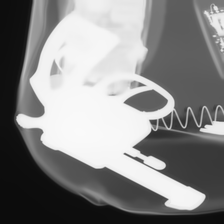

Predicted class: 676
predictions:
Benign         0.0
Knives         0.0
Gun            0.0
Razor Blade    0.0
Shuriken       1.0
Name: 676, dtype: float64


Using cache found in C:\Users\kwan/.cache\torch\hub\pytorch_vision_v0.10.0


In [133]:
input = 20
#print(image_arrays[input])
if input < max_size:
    predicted_class=prediction(image_arrays[input],df)
else:
    print(f'There are only {max_size} images to chose from.')

In [112]:
print("Shape of DataFrame df:", df.shape)
print("Predicted class:", predicted_class)

Shape of DataFrame df: (678, 5)
Predicted class: 691


In [117]:
len(df)

678